## ANALSIS EXPLORATORIO DE DATOS


### lIBRERIAS

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime

### DATASET

In [214]:
df = pd.read_csv('Bases/CEAS_08.csv')
df

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1
...,...,...,...,...,...,...,...
39149,CNN Alerts <charlene-detecton@btcmarketing.com>,email1007@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:34:50 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39150,CNN Alerts <idgetily1971@careplusnj.org>,email104@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:35:11 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39151,Abhijit Vyas <xpojhbz@gmail.com>,fxgmqwjn@triptracker.net,"Fri, 08 Aug 2008 22:00:43 +0800",Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,0
39152,Joseph Brennan <vupzesm@columbia.edu>,zqoqi@spamassassin.apache.org,"Fri, 08 Aug 2008 09:00:46 -0500",Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,0


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    39154 non-null  object
 1   receiver  38692 non-null  object
 2   date      39154 non-null  object
 3   subject   39126 non-null  object
 4   body      39154 non-null  object
 5   label     39154 non-null  int64 
 6   urls      39154 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


### CORREOS LEGITIMOS Y PHISHING

In [216]:
#Cantidad de phishing y legitimos

cantidad = df['label'].value_counts()


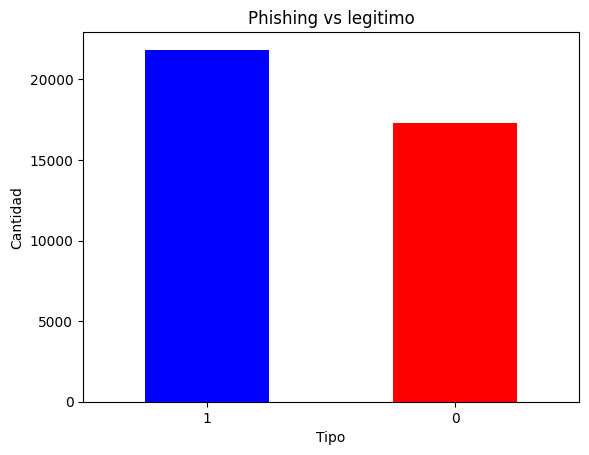

In [217]:
 #Grafica entre phishing vs legitimo

cantidad.plot(kind='bar', color=['blue', 'red'])
plt.title('Phishing vs legitimo')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()


### COMO VARIAN LOS URLS EN LOS CORREOS

In [218]:
# Cantidad de Urls en correos

url = df['urls'].value_counts()
url

urls
1    26232
0    12922
Name: count, dtype: int64

In [219]:
#LInks que aparecen en los correos

url_correos = df.groupby('label')['urls'].value_counts().unstack()
url_correos

urls,0,1
label,,
0,5969,11343
1,6953,14889


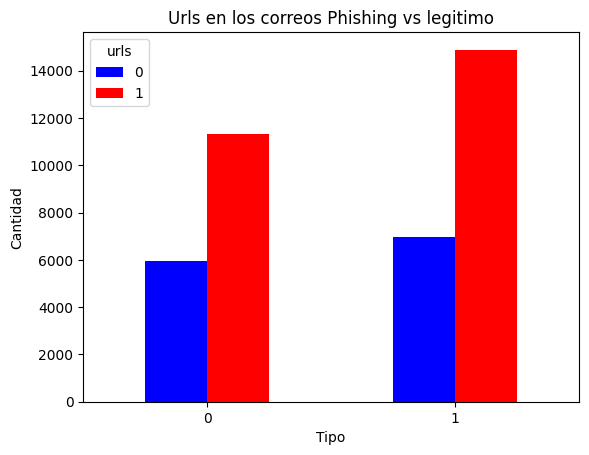

In [220]:
#Grafico para observar el comportamiento de urls en los correos

url_correos.plot(kind='bar', color=['blue', 'red'])
plt.title('Urls en los correos Phishing vs legitimo')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

### DOMINIO DE LOS CORREOS 

In [221]:
#Detectar dominios de correos 
#extract() permite extraer una parte de la cadena

df['dominios'] = df['sender'].str.extract(r'<[^@<]*@([^>]+)>')
df['dominios']

0                  iworld.de
1                  icable.ph
2        universalnet.psi.br
3                  pobox.com
4        loanofficertool.com
                ...         
39149       btcmarketing.com
39150         careplusnj.org
39151              gmail.com
39152           columbia.edu
39153             cheimes.de
Name: dominios, Length: 39154, dtype: object

In [222]:
#Dominio de correos phishing

df.loc[df['label'].isin([0, 1])].groupby('label').agg({'urls':'count','dominios': 'count',})


,urls,dominios
label,,
0,17312,15306
1,21842,20377


In [223]:
df.loc[df['urls'].isin([0, 1])].groupby('urls').agg({'label':'count','dominios': 'count',})


,label,dominios
urls,,
0,12922,12414
1,26232,23269


### COMO VARIAN LOS CORREOS POR DIA Y HORA

In [224]:
df['date'] = pd.to_datetime(df['date'], format='%a, %d %b %Y %H:%M:%S %z', errors='coerce',utc=True)
df['date']

0       2008-08-05 23:31:02+00:00
1       2008-08-05 23:31:03+00:00
2       2008-08-06 08:28:00+00:00
3       2008-08-05 23:31:20+00:00
4       2008-08-05 23:31:21+00:00
                   ...           
39149   2008-08-08 14:34:50+00:00
39150   2008-08-08 14:35:11+00:00
39151   2008-08-08 14:00:43+00:00
39152   2008-08-08 14:00:46+00:00
39153   2008-08-08 14:00:18+00:00
Name: date, Length: 39154, dtype: datetime64[ns, UTC]

In [225]:
df['dia'] = df['date'].dt.strftime('%A')


In [226]:
dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dia_semana = df.groupby('dia')['label'].value_counts().unstack().reindex(dias)
dia_semana

label,0,1
dia,,
Monday,67,111
Tuesday,679,1441
Wednesday,7505,8785
Thursday,5192,7689
Friday,3822,3662
Saturday,21,82
Sunday,26,57


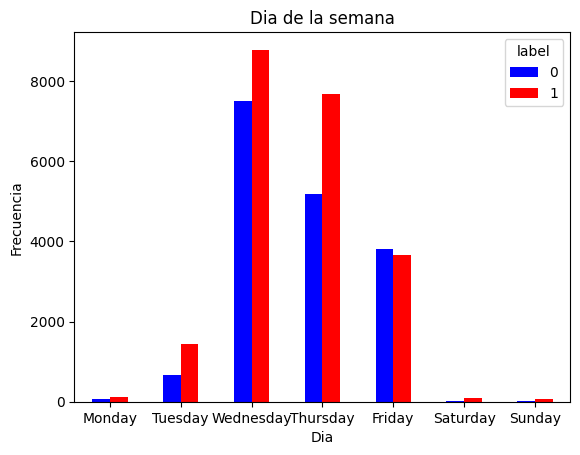

In [227]:
# Que dia de la semana se envian mas correos phising o legitmos

dia_semana.plot(kind='bar', color=['blue', 'red'])
plt.title('Dia de la semana')
plt.xlabel('Dia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

plt.show()


In [228]:
#df['hora'] = df['date'].dt.strftime('%H:%M')
df['hora'] = df['date'].dt.hour


In [229]:
hora_label = df.groupby(['hora', 'label']).size().unstack(fill_value=0)
hora_label


label,0,1
hora,,
0.0,1383,930
1.0,1186,994
2.0,1102,856
3.0,1052,998
4.0,1057,1007
5.0,761,727
6.0,735,653
7.0,747,759
8.0,640,977


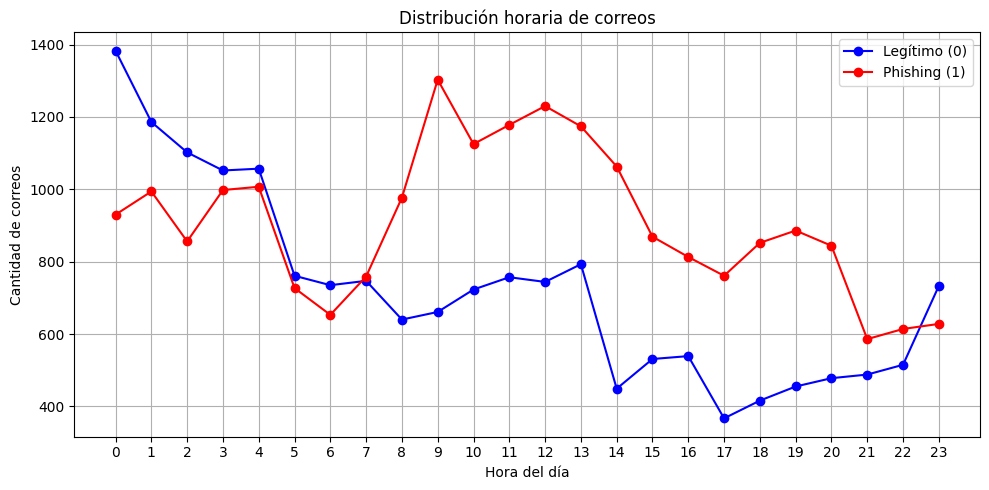

In [230]:

hora_label.plot(kind='line', marker='o', color={0: 'blue', 1: 'red'}, figsize=(10, 5))
plt.xticks(range(0, 24))
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de correos")
plt.title("Distribución horaria de correos")
plt.legend(["Legítimo (0)", "Phishing (1)"])
plt.grid(True)
plt.tight_layout()
plt.show()

### DATOS NULOS


In [231]:
#Cantidad de nulos por columnas
df.isnull().sum()

sender         0
receiver     462
date          15
subject       28
body           0
label          0
urls           0
dominios    3471
dia           15
hora          15
dtype: int64

In [271]:
dominios_legitimos = df[df['label'] == 0]['dominios'].head(10)
dominios_phishing = df[df['label'] == 1]['dominios'].head(10)


print("DOMINIOS LEGITIMOS\n", dominios_legitimos)

print("\nDOMINIOS PHISHING\n", dominios_phishing)

DOMINIOS LEGITIMOS
 3                 pobox.com
8                       NaN
15               sailing.ie
18               hotpop.com
19               hotpop.com
20                      NaN
21                 perl.org
22                      NaN
23    users.sourceforge.net
24               hotpop.com
Name: dominios, dtype: object

DOMINIOS PHISHING
 0                 iworld.de
1                 icable.ph
2       universalnet.psi.br
4       loanofficertool.com
5       thaidomainnames.com
6     thebakercompanies.com
7                 tcwpg.com
9          musicaedischi.it
10        flychautauqua.com
11              gametea.com
Name: dominios, dtype: object


In [277]:
df['links'] = df['body'].str.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
df['links']

0                                  [http://whitedone.com/]
1                              [http://www.brightmade.com]
2        [http://www.cnn.com/video/partners/email/index...
3        [http://en.wikipedia.org/wiki/.so_%28domain_na...
4        [http://7iwfna.blu.livefilestore.com/y1pXdX3kw...
                               ...                        
39149                                                   []
39150                                                   []
39151                                                   []
39152                                                   []
39153    [http://python.org/dev/peps/pep-0370/, http://...
Name: links, Length: 39154, dtype: object